
# Análisis descriptivo, tratamiento de valores faltantes y variables categóricas


## Importar datos

Cargamos las librerías necesarias.
- `pandas` y `numpy` para manipulación de datos,
- `matplotlib` para visualizaciones,
- `sklearn` para imputación y One-Hot Encoding.


In [1]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



## 1) Carga del CSV (`datos.csv` con separador `;`)


In [4]:
df = pd.read_csv("/content/drive/MyDrive/Econometria/forestfires2.csv")
df


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00



## 2) Inspección inicial

Preguntas guía:
- ¿Cuántas observaciones y variables hay?
- ¿Qué tipos de datos tenemos (numéricos, cadenas/objetos, fechas)?
- ¿Hay columnas con un único valor o muchas categorías?


In [5]:

print("Dimensiones:", df.shape)
print("\nTipos de datos:")
print(df.dtypes)

print("\nPrimeras filas:")
display(df.head())

print("\nValores únicos aproximados por columna (hasta 20 ejemplos):")
for col in df.columns:
    uniq = df[col].unique()
    print(f"- {col}: {len(uniq)} únicos. Valores:", uniq[:20])


Dimensiones: (517, 13)

Tipos de datos:
X          int64
Y          int64
month     object
day       object
FFMC     float64
DMC      float64
DC       float64
ISI      float64
temp     float64
RH         int64
wind     float64
rain     float64
area     float64
dtype: object

Primeras filas:


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0



Valores únicos aproximados por columna (hasta 20 ejemplos):
- X: 9 únicos. Valores: [7 8 6 5 4 2 9 1 3]
- Y: 7 únicos. Valores: [5 4 6 3 2 9 8]
- month: 12 únicos. Valores: ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
- day: 7 únicos. Valores: ['fri' 'tue' 'sat' 'sun' 'mon' 'wed' 'thu']
- FFMC: 106 únicos. Valores: [86.2 90.6 91.7 89.3 92.3 91.5 91.  92.5 92.8 63.5 90.9 92.9 93.3 84.9
 89.2 86.3 91.8 94.3 90.2 93.5]
- DMC: 215 únicos. Valores: [ 26.2  35.4  43.7  33.3  51.3  85.3  88.9 145.4 129.5  88.   73.2  70.8
 126.5 133.3 141.2  35.8  32.8  27.9  27.4  78.5]
- DC: 219 únicos. Valores: [ 94.3 669.1 686.9  77.5 102.2 488.  495.6 608.2 692.6 698.6 713.  665.3
 686.5 699.6 713.9  80.8 664.2  70.8  97.1 724.3]
- ISI: 119 únicos. Valores: [ 5.1  6.7  9.   9.6 14.7  8.5 10.7  7.   7.1 22.6  0.8  9.2 13.9  7.8
  3.   6.3 56.1  6.2 20.3 10.6]
- temp: 192 únicos. Valores: [ 8.2 18.  14.6  8.3 11.4 22.2 24.1  8.  13.1 22.8 17.8 19.3 17.  21.3
 26.4 22.9 15.1 16


## 3) Análisis descriptivo

- Estadísticos básicos para variables **numéricas** con `describe()`.
- Resumen de frecuencias para variables **categóricas** (tipo `object`/`category`).

> Nota: Si tienes valores numéricos almacenados como texto con comas/puntos, considera convertirlos previamente.


In [6]:

print("Estadísticos descriptivos (numéricos):")
display(df.select_dtypes(include=[np.number]).describe().T)

print("\nFrecuencias de las 10 categorías más comunes por columna categórica:")
cat_cols_raw = df.select_dtypes(include=['object','category']).columns.tolist()
for col in cat_cols_raw:
    print(f"\nColumna: {col}")
    display(df[col].value_counts(dropna=False).head(10))


Estadísticos descriptivos (numéricos):


,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40



Frecuencias de las 10 categorías más comunes por columna categórica:

Columna: month


,count
month,
aug,184
sep,172
mar,54
jul,32
feb,20
jun,17
oct,15
apr,9
dec,9



Columna: day


,count
day,
sun,95
fri,85
sat,84
mon,74
tue,64
thu,61
wed,54



### Visualizaciones rápidas

Reglas:
- Usamos `matplotlib`.
- **Una gráfica por celda**.
- **Sin estilos ni colores específicos**.

1. Histograma de la **primera columna numérica**.


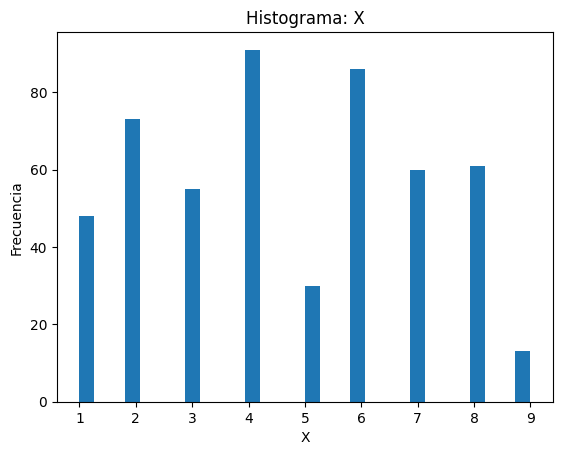

In [7]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure()
df[num_cols[0]].plot(kind='hist', bins=30, title=f'Histograma: {num_cols[0]}')
plt.xlabel(num_cols[0])
plt.ylabel('Frecuencia')
plt.show()




2. Boxplot de la **segunda columna numérica** (si existe).


<Figure size 640x480 with 0 Axes>

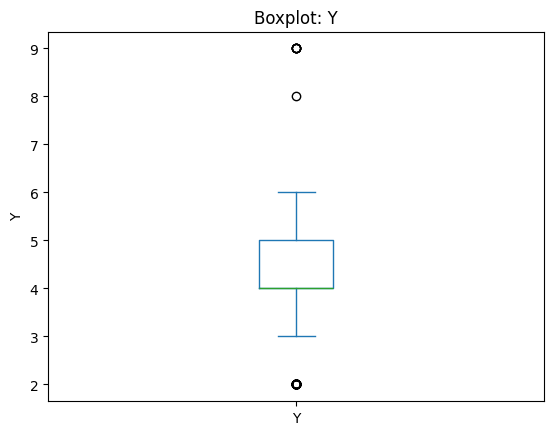

In [8]:

plt.figure()
df[[num_cols[1]]].plot(kind='box', title=f'Boxplot: {num_cols[1]}')
plt.ylabel(num_cols[1])
plt.show()



## 4) Detección de valores faltantes

Aquí calculamos el conteo de `NaN` por columna y el porcentaje de faltantes.


In [9]:

na_counts = df.isna().sum().sort_values(ascending=False)
na_pct = (df.isna().mean()*100).sort_values(ascending=False)

print("Top columnas con más faltantes:")
display(pd.DataFrame({'faltantes': na_counts, 'porcentaje': na_pct}).head(20))


Top columnas con más faltantes:


,faltantes,porcentaje
X,0,0.0
Y,0,0.0
month,0,0.0
day,0,0.0
FFMC,0,0.0
DMC,0,0.0
DC,0,0.0
ISI,0,0.0
temp,0,0.0
RH,0,0.0



## 5) Imputación de valores faltantes

Estrategia simple (puedes ajustarla):
- Para **numéricos**: imputar con **mediana** (más robusta a outliers que la media).
- Para **categóricos**: imputar con **moda** (valor más frecuente).


In [10]:

df_impute = df.copy()

num_cols = df_impute.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df_impute.select_dtypes(include=['object','category']).columns.tolist()

num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

if num_cols:
    df_impute[num_cols] = num_imputer.fit_transform(df_impute[num_cols])
if cat_cols:
    df_impute[cat_cols] = cat_imputer.fit_transform(df_impute[cat_cols])

print("Comprobación de faltantes tras imputación:")
display(df_impute.isna().sum().sort_values(ascending=False).head(10))


Comprobación de faltantes tras imputación:


,0
X,0
Y,0
month,0
day,0
FFMC,0
DMC,0
DC,0
ISI,0
temp,0
RH,0



## 6) Variables dummies

Dos caminos:
1. **`pandas.get_dummies`** (rápido) con `drop_first=True` para evitar colinealidad perfecta.  
2. **`sklearn.OneHotEncoder`** dentro de un `Pipeline` + `ColumnTransformer` (útil para modelado).

Primero, normalizamos tipos categóricos a `category`.


In [11]:

df_feat = df_impute.copy()

# Asegurar tipo categórico
for c in cat_cols:
    df_feat[c] = df_feat[c].astype('category')

# 6.1 Dummies con pandas
df_dummies_pd = pd.get_dummies(df_feat, columns=cat_cols, drop_first=True)
print("Columnas añadidas (muestra) con get_dummies:")
display([c for c in df_dummies_pd.columns if any(c.startswith(col+'_') for col in cat_cols)][:20])
display(df_dummies_pd.head())


Columnas añadidas (muestra) con get_dummies:


['month_aug',
 'month_dec',
 'month_feb',
 'month_jan',
 'month_jul',
 'month_jun',
 'month_mar',
 'month_may',
 'month_nov',
 'month_oct',
 'month_sep',
 'day_mon',
 'day_sat',
 'day_sun',
 'day_thu',
 'day_tue',
 'day_wed']

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_may,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7.0,5.0,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,...,False,False,False,False,False,False,False,False,False,False
1,7.0,4.0,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,...,False,False,True,False,False,False,False,False,True,False
2,7.0,4.0,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,...,False,False,True,False,False,True,False,False,False,False
3,8.0,6.0,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,...,False,False,False,False,False,False,False,False,False,False
4,8.0,6.0,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,...,False,False,False,False,False,False,True,False,False,False



## 7) Exportación del dataset limpio

Guardamos dos versiones:
- `datos_limpios.csv` a partir de **get_dummies (pandas)**.


In [12]:

df_dummies_pd.to_csv("datos_limpios.csv", index=False)
